# **1) Measures of Dispersion or Spread (2nd Business Moment)**

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.DataFrame({"X":[1,2,3,4,5]})
df

,X
0,1
1,2
2,3
3,4
4,5


### **1)Minimum**

In [3]:
df["X"].min()

1

### **2)Maximum**

In [4]:
df["X"].max()

5

### **3)Range**


 Range = Min - Max

In [5]:
df["X"].min() - df["X"].max()
df

,X
0,1
1,2
2,3
3,4
4,5


### **4) Deviation  (X-µ)**
- data deviated from the mean = how dispersed the data is from the central value




In [6]:
df["X-u"] = df["X"] - df["X"].mean()
df

,X,X-u
0,1,-2.0
1,2,-1.0
2,3,0.0
3,4,1.0
4,5,2.0


### **5) Mean Deviation (MD)=  ∑(X-µ) / N**

In [7]:
df["X-u"].mean()

0.0

### **6) Mean Square Deviation == Variance**

Population Variance = ∑(X-µ)^2 / N

In [8]:
df["(X-u)2"] = df["X-u"]**2
df

,X,X-u,(X-u)2
0,1,-2.0,4.0
1,2,-1.0,1.0
2,3,0.0,0.0
3,4,1.0,1.0
4,5,2.0,4.0


In [9]:
df["(X-u)2"].mean()

2.0

In [10]:
# Option 2
df["X"].var(ddof = 0)

2.0

### **6)Standard deviation:**
• It is the statistical measure of the dispersion of the dataset relative to its mean.
• It tells about, How close the values in the data set are to the mean
• High std deviation means the values are largely deviated from the mean i.e., the spread is high
• Low std deviation means the all data values are close to the mean
Population Standard Deviation (6) =  Sqrt(∑(X-µ)^2 / N)

In [11]:
from math import sqrt
# Option 1
sqrt(df["(X-u)2"].mean())

1.4142135623730951

In [12]:
# Option 2
df["X"].std(ddof=0)

1.4142135623730951

### **7)Sample Variance S^2 = ∑(X-x^bar)^2 / n-1**

In [13]:
df["X"].var(ddof=1)

2.5

### **8)Sample STD Deviation sqrt(∑(X-x^bar)^2 / n-1)**

In [14]:
df["X"].std(ddof=1)

1.5811388300841898

### **9) Coefficient of Variation**

- It means that how much the data values are varied from its mean value.
- 
**Formula:** (std.dev / mean )

**Option 1**

In [15]:
pop_std_dev = df["X"].std(ddof = 0)

In [16]:
pop_mean = df["X"].mean()

In [17]:
cv = pop_std_dev/pop_mean
cv

0.47140452079103173

**Option 2**

In [18]:
df["X"].std(ddof = 0)/df["X"].mean()

0.47140452079103173

### **10) Percentile**

- i)   0 percentilw or **minimum (Quantile 0)** : 0% of data is below to this value
- ii)  25 percentile or **Quantile 1 (Q1)** 25% of data is below to this value.
- iii) 50 percentile or **Quantile 2 (Q2)** 50% of data is below to this value.
- iv)  75 percentile or **Quantile 3 (Q3)** 75% of data is below to this value.
- v)   100 percentile or **maximum** 100% of data below to this value.

In [19]:
df = pd.DataFrame({"X":[10,11,12,25,25,27,31,33,34,36,43,50,59]})

**1) 0 Percentile or Minimum or Quartile 0** 

In [20]:
#Option 1 
Q0 = df["X"].quantile(0)
Q0

10.0

In [21]:
# Option 2 
df["X"].min()

10

**2) 25 percentile value (Q1)**

In [22]:
Q1 = df["X"].quantile(0.25)
Q1

25.0

**3) 50 Percentile (Q2)** 

In [23]:
# Option 1
Q2 = df["X"].quantile(0.5)
Q2

31.0

In [24]:
# Option 2
df["X"].median()

31.0

**4) 75 Percentile (Q3)**

In [25]:
Q3 = df["X"].quantile(0.75)
Q3

36.0

**5) 100 Percentile or Maximum**

In [26]:
df["X"].quantile(1)

59.0

In [27]:
df["X"].max()

59

**6) All in one**

In [28]:
df["X"].quantile([0,0.25,0.50,0.75,1])

0.00    10.0
0.25    25.0
0.50    31.0
0.75    36.0
1.00    59.0
Name: X, dtype: float64

### **11) Descibe function**

- The describe() function in Pandas provides a quick summary of statistics for a DataFrame or Series. It gives details like count, mean, standard deviation, minimum, and maximum values, and other statistical metrics for numeric columns.

In [29]:
df["X"].describe()

count    13.000000
mean     30.461538
std      14.757006
min      10.000000
25%      25.000000
50%      31.000000
75%      36.000000
max      59.000000
Name: X, dtype: float64

### **12) Inter Quartile Range (IQR)**

**1) IQR = Q3 - Q1**

In [30]:
IQR = Q3-Q1
print(Q3)
IQR

36.0


11.0

**2)Lower Limit**

In [31]:
l1 = Q1 - (IQR*1.5)
l1

8.5

**3)Upper Limit**

In [32]:
ul = Q3 +(IQR*1.5)
ul

52.5

### **13) Outliers**

- The datapoint that lies outside the overall distribution of the dataset

- datavalue < lowerlimit(01 - 1.5 * I0R)

- datavalue > upperlimit (Q3 + 1.5 * 1QR)

**1) How to check outliers are available or not**

<Axes: ylabel='X'>

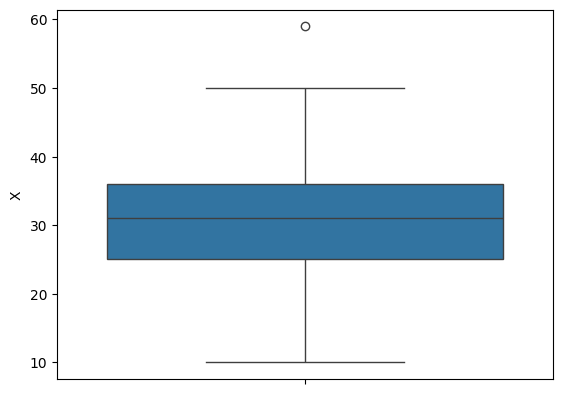

In [33]:
import seaborn as sns
sns.boxplot(df["X"])

**2) To extract the outliers Data**

In [34]:
df[(df["X"]<l1) | (df["X"] > ul)]

,X
12,59


**3) To check number of outliers**

In [35]:
#Option 1
len(df[(df["X"]<l1) | (df["X"] > ul)])

1

In [36]:
#Option 2
df[(df["X"]<l1) | (df["X"] > ul)].shape[0]

1

**4)Now we are going to check outliers in Tips** 

In [37]:
df = pd.read_excel("/Users/prasad/Prasad Folder/DATA_SCIENCE_&_GENERATIVE-AI/Data_Science_Practice/1_Python_For_Data_Science/tips.xlsx")
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


<Axes: ylabel='total_bill'>

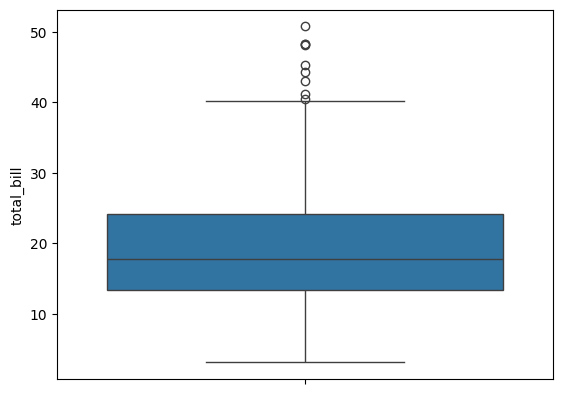

In [38]:
sns.boxplot(df["total_bill"])

In [39]:
df["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [40]:
IQR = 24.127500 - 13.347500
l1 = 13.347500 - (IQR *1.5)
ul = 24.127500 + (IQR *1.5)

In [41]:
df[(df["total_bill"]<l1) | (df["total_bill"]>ul)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
197,43.11,5.00,Female,Yes,Thur,Lunch,4,10.78,Brooke Soto,5544902205760175,Thur9313
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


In [42]:
# How many outliers are there
len(df[(df["total_bill"]<l1) | (df["total_bill"]>ul)])

9

### **Shape**

In [43]:
df = pd.DataFrame({
    "Gender": ["M", "F", "F", "F", "M", "M", "F", "M", "F", "F", "F", "F", "M", "M", "F", "M"],
    "Marks": [30,41,42, 51, 52,53,61, 62, 68,69, 77, 78, 79,88,89,100],
    "UD": [9,9.1,9.15,9.2,9.35,9.34,9.4,9.45,9.55,9.65,9.6,9.7,9.8,9.85,9.9,10],
    "X": [0,11,12,21, 22,23, 31, 32, 38, 39,47,48,49, 58,59,70],
    "Y": [0,11,12,21, 22,23,24, 28,29,33,34, 35, 37,44,59,70],
    "Z": [0,11,12,21,22,23,34,38,49,43,44, 45,47,54,59,70]})
df

,Gender,Marks,UD,X,Y,Z
0,M,30,9.00,0,0,0
1,F,41,9.10,11,11,11
2,F,42,9.15,12,12,12
3,F,51,9.20,21,21,21
4,M,52,9.35,22,22,22
5,M,53,9.34,23,23,23
6,F,61,9.40,31,24,34
7,M,62,9.45,32,28,38
8,F,68,9.55,38,29,49
9,F,69,9.65,39,33,43


In [44]:
df.shape

(16, 6)

In [45]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

In [46]:
df["Gender"].value_counts()

Gender
F    9
M    7
Name: count, dtype: int64

### **14) Frequency Distribution**
- - Graphical representation of variable with corresponding frequency.

**14.1) Discrete Frequency Distribution**
- - Graphical representation of discrete values with corresponding frequency.

In [47]:
df["Gender"].value_counts()

Gender
F    9
M    7
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

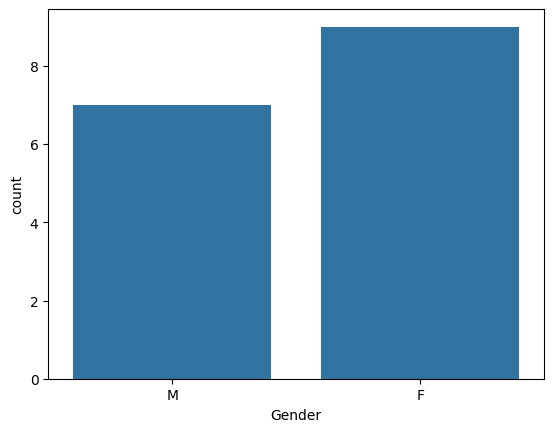

In [48]:
sns.countplot(x = df["Gender"])

<Axes: xlabel='Gender', ylabel='probability'>

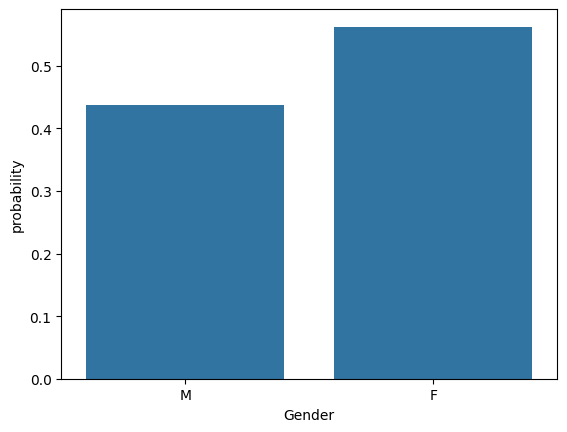

In [49]:
sns.countplot(x = df["Gender"],stat = "probability")

### **14.2)Continuous Frequency Distribution**

In [50]:
df["Marks"].unique()

array([ 30,  41,  42,  51,  52,  53,  61,  62,  68,  69,  77,  78,  79,
        88,  89, 100])

In [51]:
df["Marks"].describe()

count     16.000000
mean      65.000000
std       19.541409
min       30.000000
25%       51.750000
50%       65.000000
75%       78.250000
max      100.000000
Name: Marks, dtype: float64

<Axes: xlabel='Marks', ylabel='Count'>

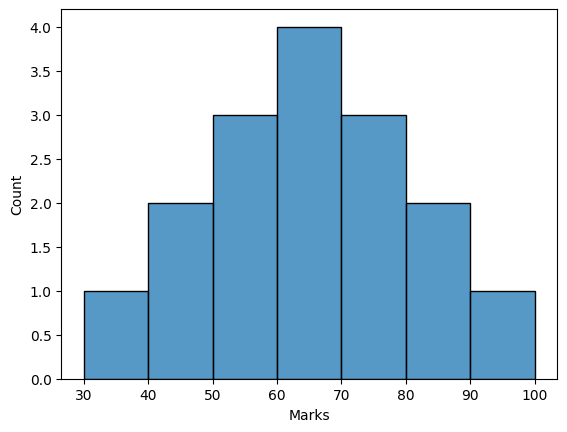

In [52]:
sns.histplot(df["Marks"],bins = 7,stat ="count")

<Axes: xlabel='Marks', ylabel='Probability'>

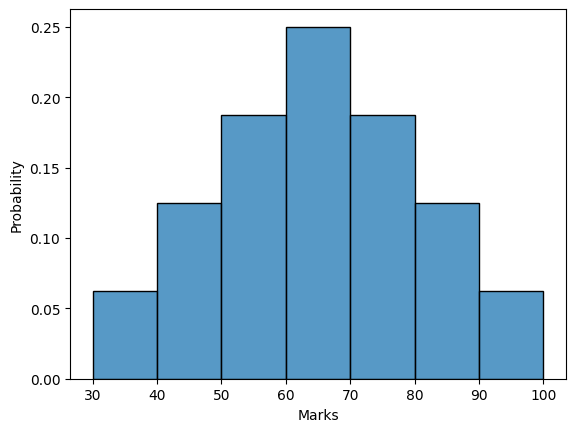

In [53]:
sns.histplot(df["Marks"],bins = 7,stat ="probability")

- Here Bins means no of bars
- 
bins = Max- Min / no of bins

### **15) Cumulative Frequency**

<Axes: xlabel='Marks', ylabel='Count'>

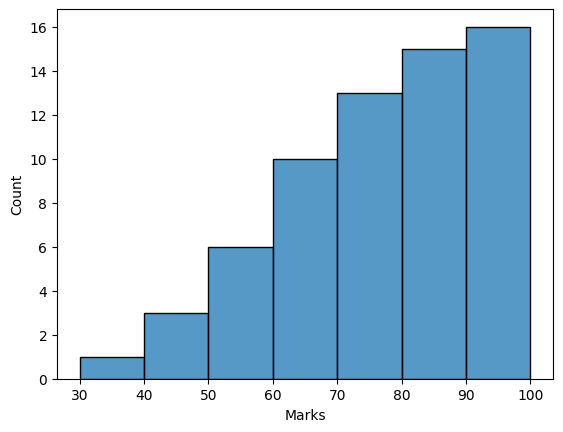

In [54]:
sns.histplot(df["Marks"], bins = 7, stat = "count",cumulative = True)

### **16) Cumulative Probablity Distribution**

<Axes: xlabel='Marks', ylabel='Probability'>

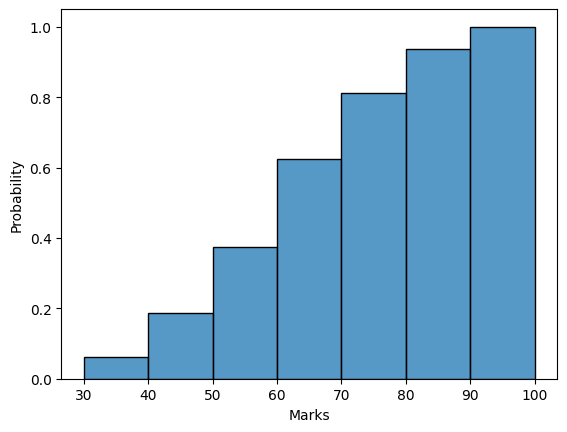

In [55]:
sns.histplot(df["Marks"], bins = 7, stat = "probability",cumulative = True)

### **17) Uniform Distribution**
- - - Applied only on continuous variable.

<Axes: xlabel='UD', ylabel='Count'>

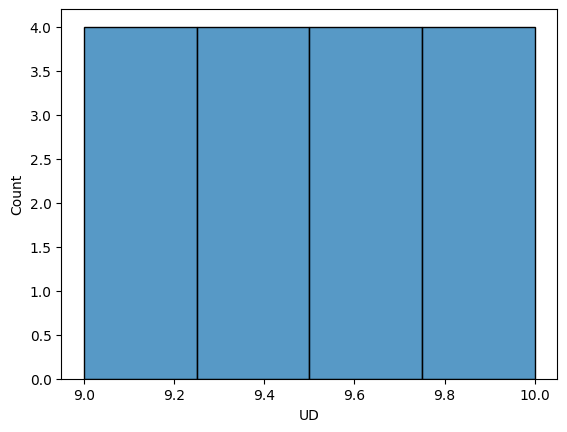

In [56]:
sns.histplot(df["UD"],bins = 4)

### **18) Shape**
• Whether the data is Symmetrical (Normal Distribution) or Unsymmetrical (Skewed Distribution)

**To check whether the data is Normally Distributed or not?**

**1. Based on Skewness value (Measure of Shape)**
-   If 'Skewness=0' then it is Perfect Symmetrical or Perfect Normal Distribution
-   If 'Skewness<0'then it said to be a Negative Skewed or Left Skewed Distibution
-   If 'Skewness> then it said to be a Positive Skewed or Right Skewed Distibution
  
**2. based on Mean & Median values**
-   If 'Mean = Median' then Normal Distribution
-   If Mean > Median' then Right Skewed Distribution
-   If 'Mean < Median' then Left Skewed Distribution
  
**3.    Based on Histogram**

**4.    Based on Density Curve**


# **2) Measures of shape 3rd Business Moment**

skewness = n/ (n-1)*(n-2)  summation of (x-x^-)^3 / s^3

### **2.1) To get the skewness value** 

In [57]:
# To get the Skewness of X
df["X"].skew()

0.0

In [58]:
# To get the Skewness of Y
df["Y"].skew()

0.6978985152470283

In [59]:
# To get the Skewness of Z
df["Z"].skew()

-0.18882851815445098

### **2.2) To Whether the data is Symmetrical (Normal Distribution) or Unsymmetrical (Skewed Distribution)**

**To check whether the data is Normally Distributed or not?**

**1) Based on Skewness value (Measure of Shape)**
-   If 'Skewness=0' then it is Perfect Symmetrical or Perfect Normal Distribution
-   If 'Skewness<0'then it said to be a Negative Skewed or Left Skewed Distibution
-   If 'Skewness> then it said to be a Positive Skewed or Right Skewed Distibution
  

In [60]:
df["X"].skew()

0.0

In [61]:
df["Y"].skew()

0.6978985152470283

In [62]:
df["Z"].skew()

-0.18882851815445098

**2) Based on Mean and Median vlaues**

-   If 'Mean = Median' then Normal Distribution
-   If Mean > Median' then Right Skewed Distribution
-   If 'Mean < Median' then Left Skewed Distribution

In [63]:
print("Mean of X:",df["X"].mean())
print("Median of X:",df["X"].median())

Mean of X: 35.0
Median of X: 35.0


In [64]:
print("Mean of Y:",df["Y"].mean())
print("Median of Y:",df["Y"].median())

Mean of Y: 30.125
Median of Y: 28.5


In [65]:
print("Mean of Z:",df["Z"].mean())
print("Median of Z:",df["Z"].median())

Mean of Z: 35.75
Median of Z: 40.5


**3) Based on Histogram**
- When we divide the histogram the resulting both the histogram is equal then it is Normally distributed.
- If we are having more number of values on left and less number of values on right then it is called right skewed.
- If we are having more number of values on right and less number of values on left then it is called left skewed

<Axes: xlabel='X', ylabel='Count'>

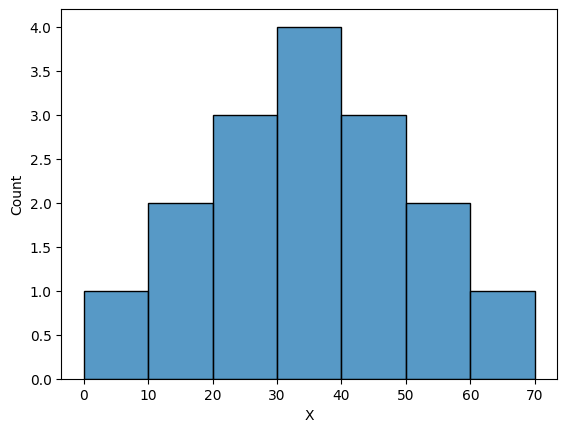

In [66]:
sns.histplot(df["X"],bins = 7)
# As we can see that the following histogram is Normally Distributed

<Axes: xlabel='Y', ylabel='Count'>

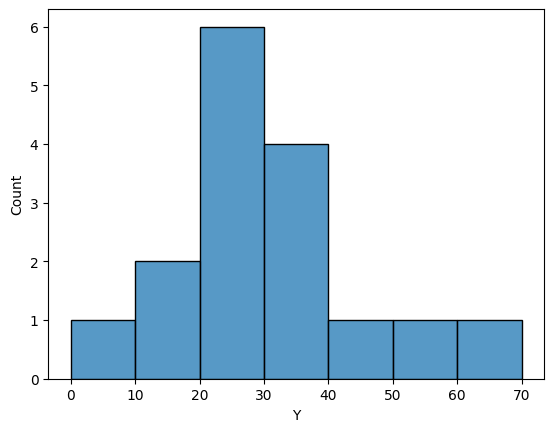

In [67]:
# Right Skewed
sns.histplot(df["Y"],bins = 7)

<Axes: xlabel='Z', ylabel='Count'>

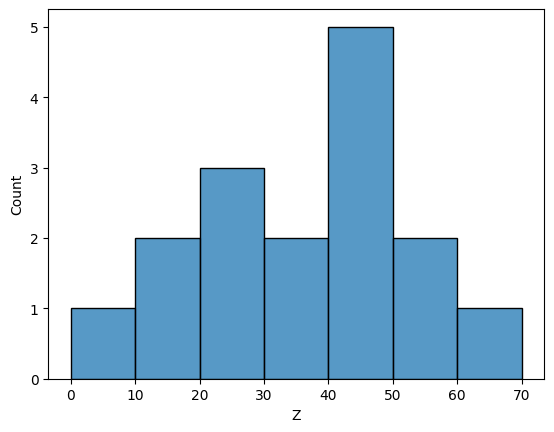

In [68]:
# Left Skewed
sns.histplot(df["Z"],bins = 7)

**4) Based on desity curve**

<Axes: xlabel='X', ylabel='Density'>

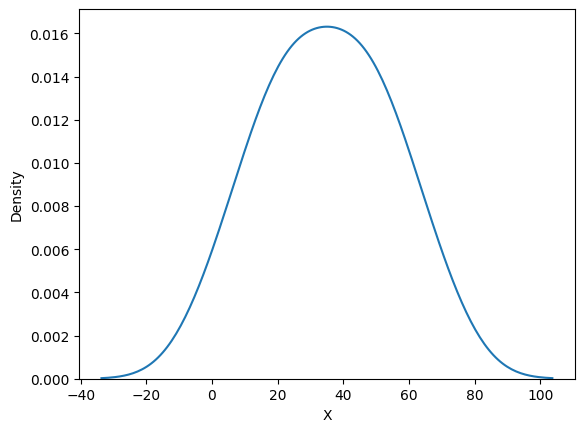

In [69]:
sns.kdeplot(df["X"])

<Axes: xlabel='Y', ylabel='Density'>

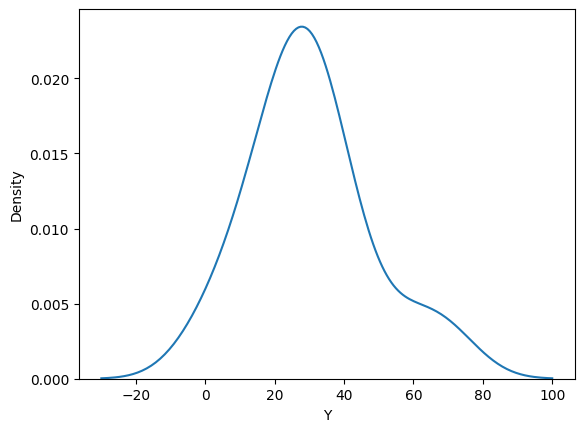

In [70]:
sns.kdeplot(df["Y"])

<Axes: xlabel='Z', ylabel='Density'>

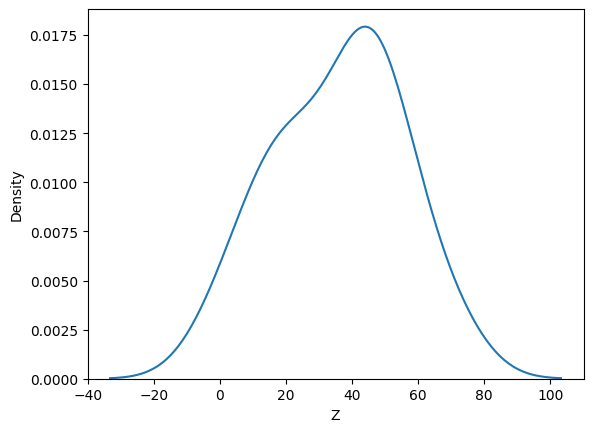

In [71]:
sns.kdeplot(df["Z"])

**5) If the mean and meadian are same then also the data is normally distributed**

In [72]:
df["X"].mean() == df["X"].median()

True

In [73]:
df["Y"].mean() == df["Y"].median()

False

In [74]:
df["Z"].mean() == df["Z"].median()

False

### **3) Probability** 
- Chance of Occurance
- **Formula-** Number of values satisfies your requirement / total number of values

#### **3.1) Probability Distribution**
             -  Graphical representation of variable and respective probabilities of variable.

**3.1.1) Discrete Probability Distribution**

<Axes: xlabel='Gender', ylabel='count'>

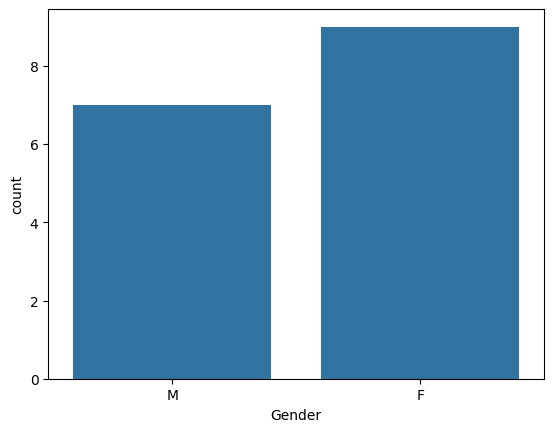

In [75]:
sns.countplot(x = df["Gender"])

**3.1.2) Continuous Probability Distribution**

         - Graphical representation of continuous variablewith corresponding probability.

In [76]:
 df["Marks"].skew()

0.0

<Axes: xlabel='Marks', ylabel='Count'>

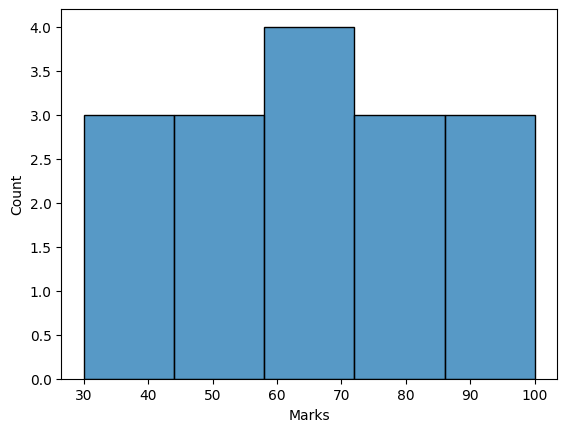

In [77]:
sns.histplot(df["Marks"],bins = 5,stat = "count")

<Axes: xlabel='Marks', ylabel='Probability'>

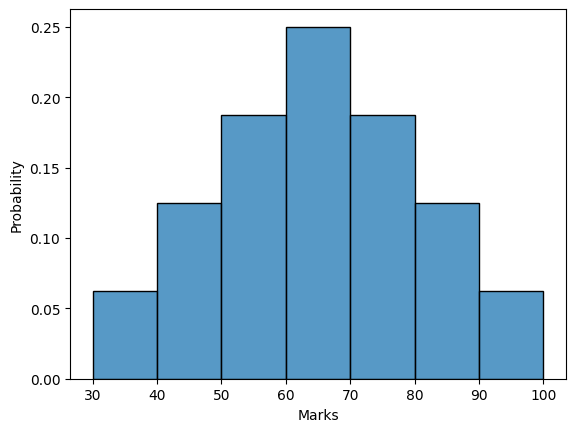

In [78]:
sns.histplot(df["Marks"],bins = 7,stat = "probability")

**3.1.3) Cumulative Probability Distribution**

<Axes: xlabel='Marks', ylabel='Probability'>

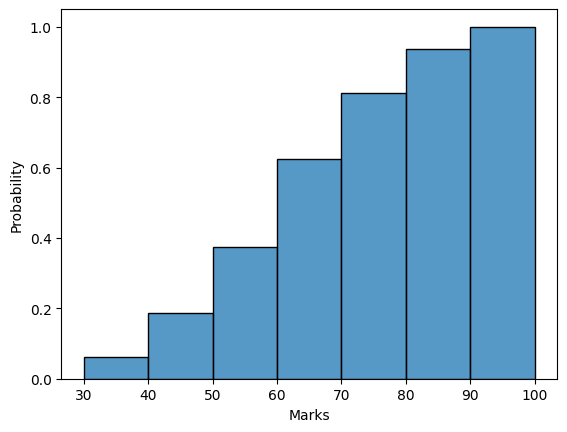

In [79]:
sns.histplot(df["Marks"],bins = 7, stat = "probability",cumulative = True)

### **4) Z Score** 

**Standardization:** Converting all x values to corresponding z-score.

**Z Distribution:** Distribution of z scores is called z distribution.

In [80]:
df = pd.DataFrame({"X":[1,2,3,4,5,]})
df

,X
0,1
1,2
2,3
3,4
4,5


In [81]:
(df["X"]-df["X"].mean())/(df["X"].std(ddof = 0))

0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
Name: X, dtype: float64

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
StandardScaler().fit_transform(df[["X"]])

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

**Q1) Suppose that we gathered data from last mock test conducted at NARESH IT and found that it followed Normal distribution what proportion of stdents score lesss than 49 in that exam**

In [84]:
z_value = (49-60)/10
z_value

-1.1

In [85]:
# calcuate probability using z score
from scipy import stats
stats.norm.cdf(-1.1)

0.13566606094638267

**How Many Students less than 69**

In [86]:
z = (69-60)/10
z

0.9

In [87]:
stats.norm.cdf(0.9)

0.8159398746532405

**Q2) The Normal distributed data with mean of 70 and std dev is 10 Approximately what area is contained between 70 to 90**

In [88]:
z_70 = (70-70)/10
z_70

0.0

In [89]:
# Probability from 0 to 70 
stats.norm.cdf(0)

0.5

In [90]:
# Probability form 0 to 90
z_90 = (90-70)/10
z_90

2.0

In [91]:
stats.norm.cdf(2.0)

0.9772498680518208

In [92]:
# Probability  form 70 to 90
0.9772498680518208 - 0.5

0.4772498680518208

### **5)Central Limit Therom** 

• For continous variable, Probability of a single value is Zero

• Since, Probability can' be calculated for a single value, we take a interval i.e., Point Estimate +- std. error

• standard error = std dev/ sqrt(n)

• **The probability for the continuous variable is calculated on interval only for which CLT is used**

### **6) Confidence Interval**

                                         Formula 1 in Notebook

                                         Formula 2 in Notebook

- a is the error.
- If the confidence is 95% then the error is 5% so a is 0.05
- for 90% confidence Z1-a = 1.281 and Z1-a/2 = 1.645

**To get probability based on ZScore**

In [93]:
stats.norm.cdf(1.14)

0.8728568494372018

**To get Z score based on probability**

In [94]:
stats.norm.ppf(0.8729)

1.1402071725636231

### **7) Bivartiate and Multivartiate Analysis**

In [95]:
import pandas as pd

In [96]:
df = pd.DataFrame({"x":[1,2,3,4,5],"y":[3,5,4,2,6],"z":[5,6,2,3,1]})

In [97]:
df.cov()

,x,y,z
x,2.50,0.75,-2.75
y,0.75,2.50,-0.75
z,-2.75,-0.75,4.30


**Bivartiate Measures**
1) Covariance
2) Corelation

#### **7.1)Covariance**

- Covariance is used on two continuous variable,unlike variance which is a univartiate
- It is represented as cov, for X and Y variance it can can be represented as cov(x,y)

**-                                           Formula in BOOK**

-  In univariant variancde since it is applied on a single variable that is var(x,x) which becomes (x - xbar) (x-xbar)
- The range of covariance value is (-infinity,infinity )
- zero cov denotes no relation between two variables.
- If cov is positive x and y are dirctly proportional of it is negative then they are inversely proportional.
- In onvariance sighn is important not value
- It can be applied only on variables which have equal number of datapoints.


In [98]:
df.cov()

,x,y,z
x,2.50,0.75,-2.75
y,0.75,2.50,-0.75
z,-2.75,-0.75,4.30


#### **7.2) Correlation**

- It measures the degree to which two vaariables are  related to each other.
- It is ued to show how two variables are related and is represented with r.
- Range of corelation is [-1,1]
**Formula In Book**
- Corelation value is important not the sign, based on the value we can tell how relaed they are.
- The corr() function is used to calculate the correlation between two variables. crrelation is a statistical measure that shows how strongly twp variables are related to each other.

|r| = 1  - Perfect Correlation

|r| > 0.8 - strong corrrelation

0.5 <= |r| >= 0.8  - moderate

|r| < 0.5  - weak correlation

|r| = 0 No correlation

In [99]:
df.corr()

,x,y,z
x,1.000000,0.300000,-0.838742
y,0.300000,1.000000,-0.228748
z,-0.838742,-0.228748,1.000000
